<a href="https://colab.research.google.com/github/Yashwanth0907/Image-Background-Removal/blob/main/Image_Background_Removal_BiRefNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Downloading all codes & dependencies
!git clone https://github.com/ZhengPeng7/BiRefNet.git
!pip uninstall -q torchaudio torchdata torchtext -y
!pip install -q -r BiRefNet/requirements.txt
!pip install -q -U gdown
# Download a sample image in very high resolution
!gdown 1DGBe63XrwwSutS84FrrrjDga3BiuQsRc
!mkdir images_todo
!mv Helicopter-HR.jpg images_todo/
# Download weights locally
!wget https://github.com/ZhengPeng7/BiRefNet/releases/download/v1/BiRefNet-general-epoch_244.pth
%cd BiRefNet

Cloning into 'BiRefNet'...
remote: Enumerating objects: 1452, done.
remote: Counting objects: 100% (670/670), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 1452 (delta 617), reused 544 (delta 529), pack-reused 782 (from 1)
Receiving objects: 100% (1452/1452), 5.44 MiB | 18.08 MiB/s, done.
Resolving deltas: 100% (1010/1010), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 710.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.4/899.4 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 9.5 MB/s eta 0:00:00
Downloading...
From: https://drive.google.com/uc?id=1DGBe63XrwwSutS84FrrrjDga3BiuQsRc
To: /content/Helicopter-HR.jpg
100% 639k/639k [00:00<00:00, 149MB/s]
--2024-12-27 

In [2]:
# Imports
from PIL import Image
import torch
from torchvision import transforms
from IPython.display import display

from models.birefnet import BiRefNet


# # Option 1: loading BiRefNet with weights:
from transformers import AutoModelForImageSegmentation
birefnet = AutoModelForImageSegmentation.from_pretrained('zhengpeng7/BiRefNet', trust_remote_code=True)

# # Option-2: loading weights with BiReNet codes:
# birefnet = BiRefNet.from_pretrained('zhengpeng7/BiRefNet')

# # Option-3: Loading model and weights from local disk:
# from utils import check_state_dict

# birefnet = BiRefNet(bb_pretrained=False)
# state_dict = torch.load('../BiRefNet-general-epoch_244.pth', map_location='cpu')
# state_dict = check_state_dict(state_dict)
# birefnet.load_state_dict(state_dict)


# Load Model
device = 'cuda'
torch.set_float32_matmul_precision(['high', 'highest'][0])

birefnet.to(device)
birefnet.eval()
print('BiRefNet is ready to use.')

# Input Data
transform_image = transforms.Compose([
    transforms.Resize((1024, 1024)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/405 [00:00<?, ?B/s]

BiRefNet_config.py:   0%|          | 0.00/298 [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/zhengpeng7/BiRefNet:
- BiRefNet_config.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


birefnet.py:   0%|          | 0.00/92.0k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/zhengpeng7/BiRefNet:
- birefnet.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.10/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.10/dist-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)
/usr/local/lib/python3.10/dist-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not

model.safetensors:   0%|          | 0.00/885M [00:00<?, ?B/s]

BiRefNet is ready to use.


Processing ../images_todo/Helicopter-HR.jpg ...
Processing ../images_todo/321202598.JPG ...
Processing ../images_todo/321202590.JPG ...


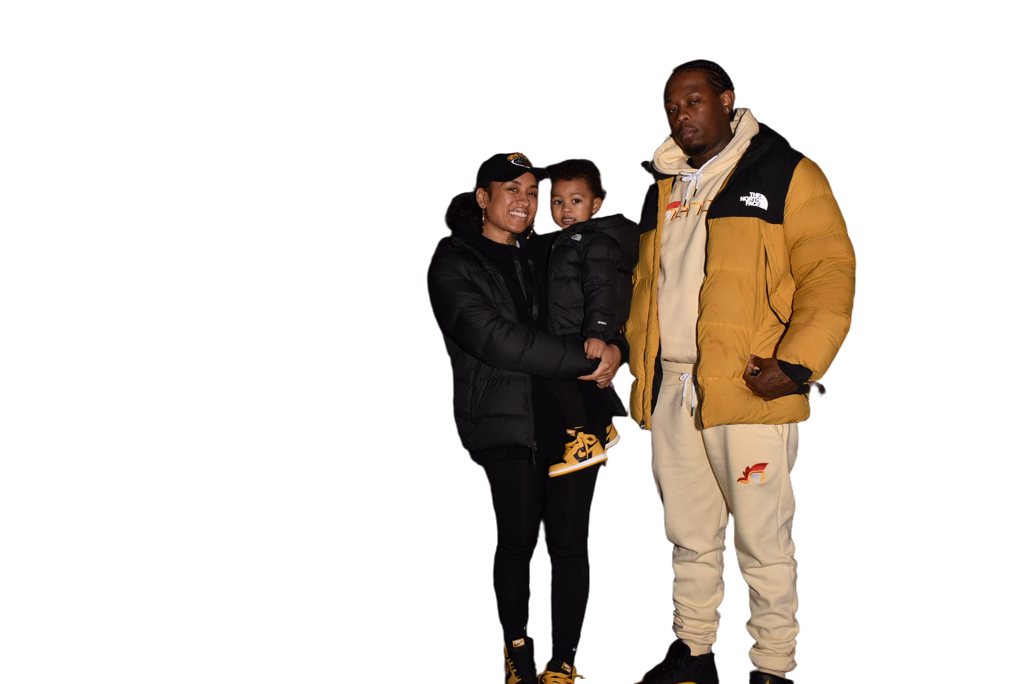

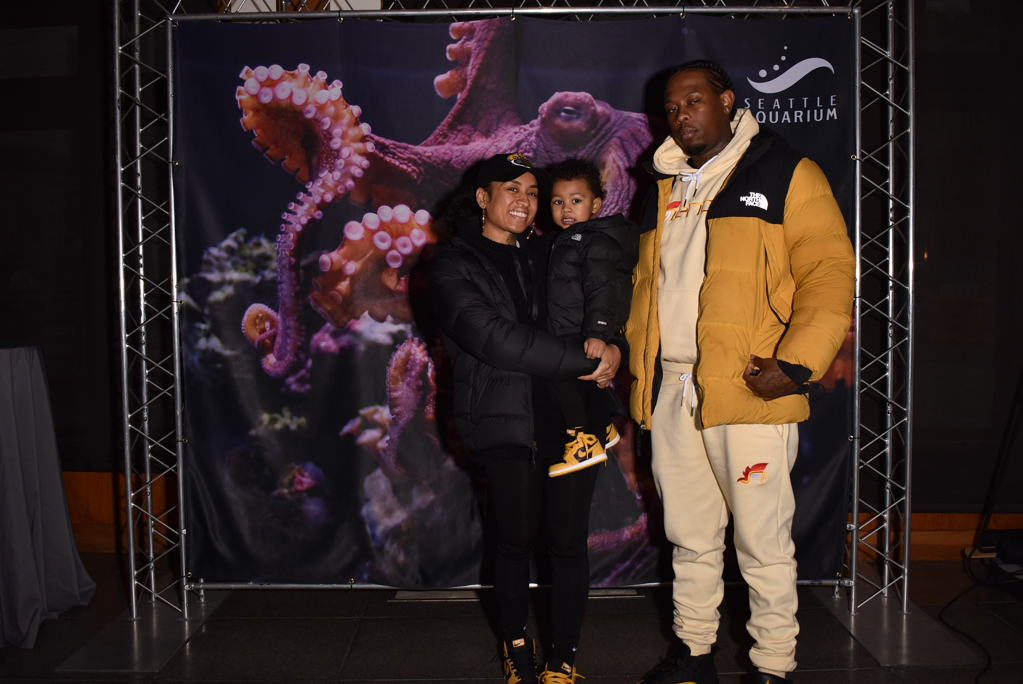

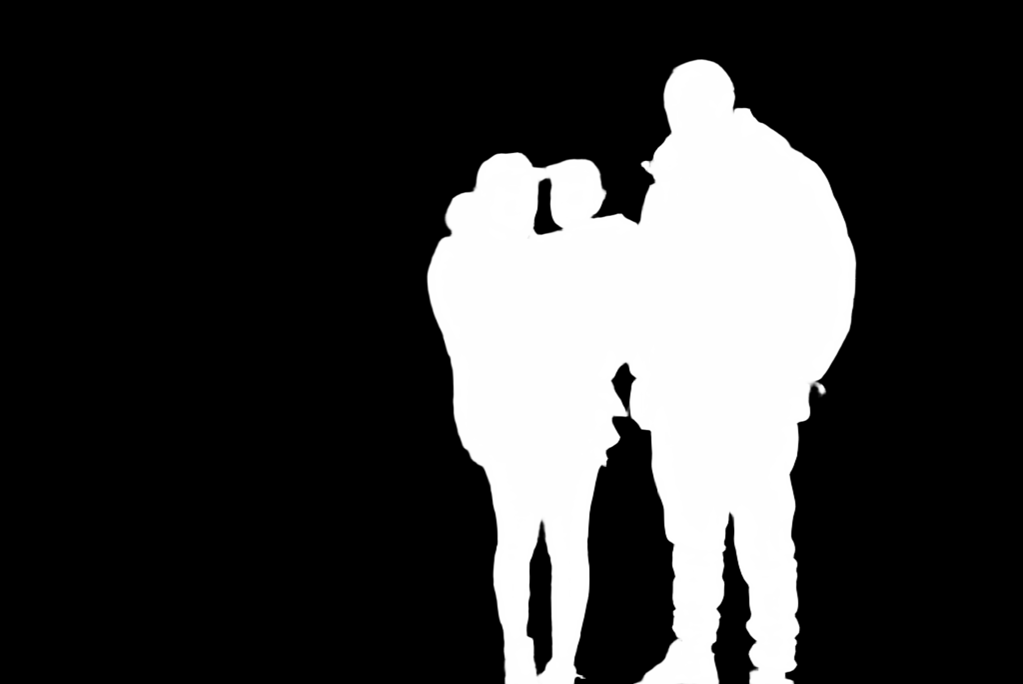

In [3]:
import os
from glob import glob
from image_proc import refine_foreground

src_dir = '../images_todo'
image_paths = glob(os.path.join(src_dir, '*'))
dst_dir = '../predictions'
os.makedirs(dst_dir, exist_ok=True)
for image_path in image_paths:
    print('Processing {} ...'.format(image_path))
    image = Image.open(image_path)
    input_images = transform_image(image).unsqueeze(0).to('cuda')

    # Prediction
    with torch.no_grad():
        preds = birefnet(input_images)[-1].sigmoid().cpu()
    pred = preds[0].squeeze()

    # Save Results
    file_ext = os.path.splitext(image_path)[-1]
    pred_pil = transforms.ToPILImage()(pred)
    pred_pil = pred_pil.resize(image.size)
    pred_pil.save(image_path.replace(src_dir, dst_dir).replace(file_ext, '-mask.png'))
    image_masked = refine_foreground(image, pred_pil)
    image_masked.putalpha(pred_pil)
    image_masked.save(image_path.replace(src_dir, dst_dir).replace(file_ext, '-subject.png'))

# Visualize the last sample:
# Scale proportionally with max length to 1024 for faster showing
scale_ratio = 1024 / max(image.size)
scaled_size = (int(image.size[0] * scale_ratio), int(image.size[1] * scale_ratio))

display(image_masked.resize(scaled_size))
display(image.resize(scaled_size))
display(pred_pil.resize(scaled_size))

In [ ]:
# import requests
# from io import BytesIO


# image_url = "https://qph.cf2.quoracdn.net/main-qimg-d89362d538d350a4e4218a366e0d0425-pjlq"
# response = requests.get(image_url)
# image_data = BytesIO(response.content)
# image = Image.open(image_data)
# input_images = transform_image(image).unsqueeze(0).to('cuda')

# # Prediction
# with torch.no_grad():
#     preds = birefnet(input_images)[-1].sigmoid().cpu()
# pred = preds[0].squeeze()

# # Show Results
# pred_pil = transforms.ToPILImage()(pred)
# # Scale proportionally with max length to 1024 for faster showing
# scale_ratio = 1024 / max(image.size)
# scaled_size = (int(image.size[0] * scale_ratio), int(image.size[1] * scale_ratio))
# image_masked = image.resize((1024, 1024))
# image_masked.putalpha(pred_pil)
# display(image_masked.resize(scaled_size))
# display(image.resize(scaled_size))
# display(pred_pil.resize(scaled_size))